In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from scipy.integrate import odeint
from sklearn.impute import SimpleImputer



ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "E:\Anconda\python.exe"
  * The NumPy version is: "1.19.0"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: No module named 'numpy.core._multiarray_umath'


1) Chargement des données casablanca 


In [3]:
dfcasa=pd.read_excel(r"C:\Users\youne\Desktop\pfa\DataFrame.xlsx","Casablanca-settat")
dfcasa

NameError: name 'pd' is not defined

2)traitement des données manquante


In [3]:
imputer_mean=SimpleImputer(missing_values=np.nan,strategy="mean") 
df_casa_inf_recu=imputer_mean.fit_transform(dfcasa[['infecté','recupéré']])

In [4]:
df_casa_inf_recu=df_casa_inf_recu.T
t=dfcasa["la date"]
print(t.shape)
print(df_casa_inf_recu[0].shape)
print(dfcasa["morts"].shape)

(81,)
(81,)
(81,)


In [5]:
liste=[23,30,32,36,39,42,45,49,52,58,61,64,67,70,79]
for i in liste:
    dfcasa["morts"]=0

E:\Anconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


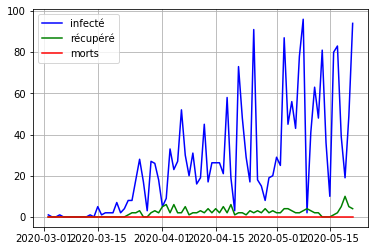

In [6]:
def plot_data(df_casa_inf_recu,dfcasa,t):
    plt.plot(t, df_casa_inf_recu[0].T, color='blue', label='infecté')
    plt.plot(t, df_casa_inf_recu[1].T, color='green', label='récupéré')
    plt.plot(t, dfcasa["morts"], color='red', label='morts')
    leg = plt.legend();
    plt.grid()
    plt.show()
plot_data(df_casa_inf_recu,dfcasa,t)

In [7]:
def Data_frame(N,df_casa_inf_recu,dfcasa):
    Suscptible=[]
    S=N
    for i in range(len(dfcasa["morts"])):
        S=S-df_casa_inf_recu[0][i]-df_casa_inf_recu[1][i]
        Suscptible.append(S)
    dataf_casa= pd.DataFrame({'la_date':t,'suscptible':Suscptible,'Infectés':df_casa_inf_recu[0],'récupérés':df_casa_inf_recu[1],'morts':dfcasa["morts"]})
    return dataf_casa
dataf_casa=Data_frame(40000,df_casa_inf_recu,dfcasa)
dataf_casa

,la_date,suscptible,Infectés,récupérés,morts
0,2020-03-02,39999.00000,1.0,0.000000,0
1,2020-03-03,39999.00000,0.0,0.000000,0
2,2020-03-04,39999.00000,0.0,0.000000,0
3,2020-03-05,39998.00000,1.0,0.000000,0
4,2020-03-06,39998.00000,0.0,0.000000,0
...,...,...,...,...,...
76,2020-05-17,37931.82967,83.0,2.015873,0
77,2020-05-18,37887.82967,39.0,5.000000,0
78,2020-05-19,37858.82967,19.0,10.000000,0
79,2020-05-20,37804.82967,49.0,5.000000,0


In [8]:
def Dectect_aberrante(dataf_casa):
        Q1,Q2,Q3=np.percentile(dataf_casa.Infectés,[25,50,75])
        borne_infI=Q1-1.5*(Q3-Q1)
        borne_supI=Q3+1.5*(Q3-Q1)
        for i in range(len(dataf_casa.Infectés)):
            if dataf_casa.Infectés[i]<borne_infI or dataf_casa.Infectés[i]>borne_supI:
                print(dataf_casa.Infectés[i])
                dataf_casa.Infectés[i]=statistics.mean(dataf_casa.Infectés)
        Q1_R,Q2_R,Q3_R=np.percentile(dataf_casa.récupérés,[25,50,75])
        borne_infR=Q1_R-1.5*(Q3_R-Q1_R)
        borne_supR=Q3_R+1.5*(Q3_R-Q1_R)
        for i in range(len(dataf_casa.récupérés)):
            if dataf_casa.récupérés[i]<borne_infR or dataf_casa.récupérés[i]>borne_supR:
                print(dataf_casa.récupérés[i])
                dataf_casa.récupérés[i]=statistics.mean(dataf_casa.récupérés)
        return dataf_casa

In [9]:
dataf_casa=Dectect_aberrante(dataf_casa)

96.0
94.0
10.0


E:\Anconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


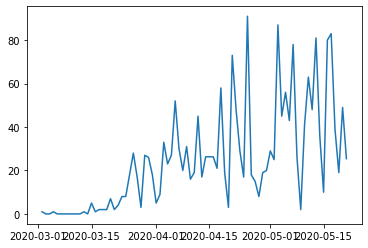

In [10]:
plt.plot(dataf_casa.la_date,dataf_casa.Infectés)

# resolution du modéle


In [11]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y 
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [12]:
def filtrage(N,I0,R0,t,dataf_casa):
    S0=N-I0-R0
    y0 = S0, I0, R0
    dictionnaire_I={}
    dictionnaire_R={}
    for gamma in np.arange(0.001,1,0.01):
        for beta in np.arange(0.001,1,0.01):
            ret = odeint(deriv, y0, t, args=(N, beta, gamma))
            St,It,Rt=ret.T
            DiffS=St-dataf_casa.suscptible
            DiffI=It-dataf_casa.Infectés
            DiffR=Rt-dataf_casa.récupérés
            cv=DiffS-DiffI-DiffR
            normI=np.linalg.norm(cv)
            dictionnaire_I["beta est:{} gamma est:{}".format(beta,gamma)]=normI
    return dictionnaire_I,dictionnaire_R

In [13]:
dictionnaire_I,dictionnaire_R=filtrage(40000,1,0,np.arange(2,83),dataf_casa)

In [14]:
dictionnaire_I

{'beta est:0.001 gamma est:0.001': 9218.32739508416,
 'beta est:0.011 gamma est:0.001': 9206.737808311778,
 'beta est:0.020999999999999998 gamma est:0.001': 9184.275298232787,
 'beta est:0.030999999999999996 gamma est:0.001': 9140.144376144577,
 'beta est:0.040999999999999995 gamma est:0.001': 9052.443022646243,
 'beta est:0.05099999999999999 gamma est:0.001': 8876.56821552118,
 'beta est:0.06099999999999999 gamma est:0.001': 8521.97991028973,
 'beta est:0.071 gamma est:0.001': 7809.204059145199,
 'beta est:0.08099999999999999 gamma est:0.001': 6420.761097488512,
 'beta est:0.09099999999999998 gamma est:0.001': 4281.998741492022,
 'beta est:0.10099999999999998 gamma est:0.001': 6704.622905416904,
 'beta est:0.11099999999999999 gamma est:0.001': 19429.574624727888,
 'beta est:0.12099999999999998 gamma est:0.001': 43650.17110495145,
 'beta est:0.13099999999999998 gamma est:0.001': 81744.41322043803,
 'beta est:0.141 gamma est:0.001': 131180.81230686323,
 'beta est:0.15099999999999997 gam

In [15]:
def keyminval(d):
    v=list(d.values())
    u=list(d.keys())
    return u[v.index(min(v))],min(v)

In [16]:
keyminval(dictionnaire_I)

('beta est:0.9909999999999999 gamma est:0.9309999999999998',
 1607.5578042975749)

In [17]:
keyminval(dictionnaire_I)


('beta est:0.9909999999999999 gamma est:0.9309999999999998',
 1607.5578042975749)

In [18]:
keyminval(dictionnaire_I)

('beta est:0.9909999999999999 gamma est:0.9309999999999998',
 1607.5578042975749)

In [19]:
def SolutionSIR(N,I0,R0,t,beta,gamma):
    S0=N-I0-R0
    y0 = S0, I0, R0
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    St,It,Rt=ret.T
    return St,It,Rt

In [20]:
#St,It,Rt=SolutionSIR(4000000,1,0,np.arange(2,183),0.7509999999999999,0.691)

In [21]:
St,It,Rt=SolutionSIR(40000,1,0,np.arange(2,183),0.990,0.930)

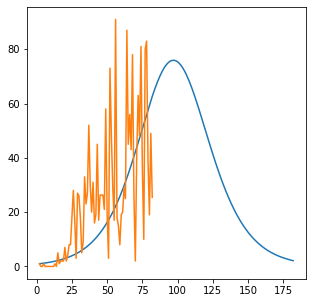

In [22]:
plt.figure(figsize=(5,5))
plt.plot(np.arange(2,183),It)
plt.plot(np.arange(2,83),dataf_casa.Infectés)
plt.savefig("casablancaRA.png")
plt.show()


In [69]:
#dg=pd.DataFrame({"temps":np.arange(2,183),"infecte":It})
t=[[i] for i in range(2,183)]
I=[[int(i)] for i in It]

In [72]:
dg=np.hstack((t,I))
dg



array([[  2,   1],
       [  3,   1],
       [  4,   1],
       [  5,   1],
       [  6,   1],
       [  7,   1],
       [  8,   1],
       [  9,   1],
       [ 10,   1],
       [ 11,   1],
       [ 12,   1],
       [ 13,   1],
       [ 14,   2],
       [ 15,   2],
       [ 16,   2],
       [ 17,   2],
       [ 18,   2],
       [ 19,   2],
       [ 20,   2],
       [ 21,   3],
       [ 22,   3],
       [ 23,   3],
       [ 24,   3],
       [ 25,   3],
       [ 26,   4],
       [ 27,   4],
       [ 28,   4],
       [ 29,   4],
       [ 30,   5],
       [ 31,   5],
       [ 32,   5],
       [ 33,   6],
       [ 34,   6],
       [ 35,   7],
       [ 36,   7],
       [ 37,   7],
       [ 38,   8],
       [ 39,   8],
       [ 40,   9],
       [ 41,   9],
       [ 42,  10],
       [ 43,  11],
       [ 44,  11],
       [ 45,  12],
       [ 46,  13],
       [ 47,  13],
       [ 48,  14],
       [ 49,  15],
       [ 50,  16],
       [ 51,  17],
       [ 52,  18],
       [ 53,  19],
       [ 54,

In [37]:
dg[1][1]

1.0617969955221622

In [64]:
'''data_interpelles=dfff["Interpellés"]
data_températeur=dfff["Température"]
data_interpelles_casa=[]
data_températeur_casa=[]
for i,j in zip(data_interpelles[9::12],data_températeur[9::12]):
    data_interpelles_casa.append(i)
    data_températeur_casa.append(j)
data_interpelles_casa.insert(len(data_températeur_casa),73)
data_températeur_casa.insert(len(data_températeur_casa),25)  
'''

'data_interpelles=dfff["Interpellés"]\ndata_températeur=dfff["Température"]\ndata_interpelles_casa=[]\ndata_températeur_casa=[]\nfor i,j in zip(data_interpelles[9::12],data_températeur[9::12]):\n    data_interpelles_casa.append(i)\n    data_températeur_casa.append(j)\ndata_interpelles_casa.insert(len(data_températeur_casa),73)\ndata_températeur_casa.insert(len(data_températeur_casa),25)  \n'

## Région marrakeche

In [78]:
dfmarr=pd.read_excel(r"C:\Users\youne\Desktop\pfa\DataFrame.xlsx","Marrakech-asfi")


In [79]:
imputer_mean=SimpleImputer(missing_values=np.nan,strategy="mean") 
df_marr_inf_recu=imputer_mean.fit_transform(dfmarr[['infecté','récupéré']])


In [80]:
df_marr_inf_recu=df_marr_inf_recu.T
tt=dfmarr["date"]
print(tt.shape)
print(df_marr_inf_recu[0].shape)
print(dfmarr["morts"].shape)

(80,)
(80,)
(80,)


In [81]:
dfmarr["morts"][np.isnan(dfmarr["morts"])]=0

E:\Anconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
dfmarr["morts"][42]

0.0

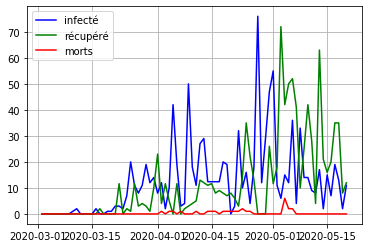

In [83]:
plot_data(df_marr_inf_recu,dfmarr,tt)

In [87]:
Suscptible=[]
S=30000
for i in range(80):
    S=S-df_marr_inf_recu[0][i]-df_marr_inf_recu[1][i]
    Suscptible.append(S)
dataf_marr= pd.DataFrame({'la_date':tt,'suscptible':Suscptible,'Infectés':df_marr_inf_recu[0],'récupérés':df_marr_inf_recu[1],'morts':dfmarr["morts"]})


In [89]:
dataf_marr=Dectect_aberrante(dataf_marr)

36.0
33.0


E:\Anconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


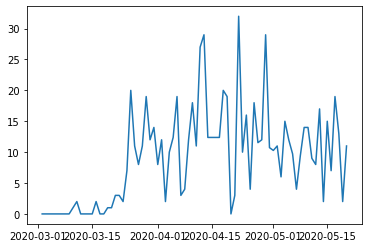

In [90]:
plt.plot(dataf_marr.la_date,dataf_marr.Infectés)

In [91]:
dictionnaire_II,dictionnaire_R=filtrage(30000,1,0,np.arange(2,82),dataf_marr)

In [92]:
keyminval(dictionnaire_II)

('beta est:0.9409999999999998 gamma est:0.8809999999999999',
 1153.5594195107174)

In [93]:
Stt,Itt,Rtt=SolutionSIR(30000,1,0,np.arange(2,183),0.940,0.88)

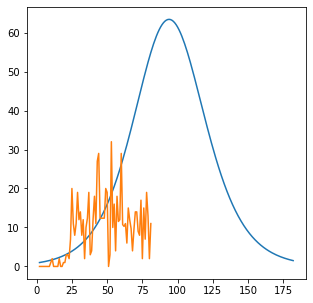

In [97]:
plt.figure(figsize=(5,5))
plt.plot(np.arange(2,183),Itt)
plt.plot(np.arange(2,82),dataf_marr.Infectés)
plt.savefig("marrakcheRA.png")
plt.show()



## Région Rabat

In [98]:
dfrabat=pd.read_excel(r"C:\Users\youne\Desktop\pfa\DataFrame.xlsx","Rabat - Sale - Kenitra")
dfrabat

,date,infecte,morts,recuperé,temperature
0,2020-03-02,0.0,0.0,0.0,16.0
1,2020-03-03,0.0,0.0,0.0,15.5
2,2020-03-04,0.0,0.0,0.0,16.0
3,2020-03-05,0.0,0.0,0.0,15.0
4,2020-03-06,0.0,0.0,0.0,14.5
...,...,...,...,...,...
76,2020-05-17,4.0,0.0,18.0,17.0
77,2020-05-18,1.0,0.0,4.0,19.0
78,2020-05-19,7.0,0.0,6.0,19.0
79,2020-05-20,6.0,0.0,23.0,19.0


In [99]:
imputer_mean=SimpleImputer(missing_values=np.nan,strategy="mean") 
df_rabat_inf_recu=imputer_mean.fit_transform(dfrabat[['infecte','recuperé']])


In [100]:
df_rabat_inf_recu=df_rabat_inf_recu.T
ttt=dfrabat["date"]
print(ttt.shape)
print(df_rabat_inf_recu[0].shape)
print(dfrabat["morts"].shape)

(81,)
(81,)
(81,)


In [101]:
dfrabat["morts"][np.isnan(dfrabat["morts"])]=0

E:\Anconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


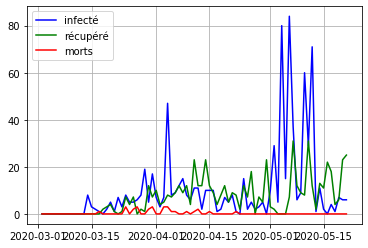

In [102]:
plot_data(df_rabat_inf_recu,dfrabat,ttt)

In [103]:
Suscptiblet=[]
S=40000
for i in range(81):
    S=S-df_rabat_inf_recu[0][i]-df_rabat_inf_recu[1][i]
    Suscptiblet.append(S)
dataf_rabat= pd.DataFrame({'la_date':ttt,'suscptible':Suscptiblet,'Infectés':df_rabat_inf_recu[0],'récupérés':df_rabat_inf_recu[1],'morts':dfrabat["morts"]})
dataf_rabat

,la_date,suscptible,Infectés,récupérés,morts
0,2020-03-02,40000.000000,0.0,0.0,0.0
1,2020-03-03,40000.000000,0.0,0.0,0.0
2,2020-03-04,40000.000000,0.0,0.0,0.0
3,2020-03-05,40000.000000,0.0,0.0,0.0
4,2020-03-06,40000.000000,0.0,0.0,0.0
...,...,...,...,...,...
76,2020-05-17,38685.675676,4.0,18.0,0.0
77,2020-05-18,38680.675676,1.0,4.0,0.0
78,2020-05-19,38667.675676,7.0,6.0,0.0
79,2020-05-20,38638.675676,6.0,23.0,0.0


In [104]:
dataf_rabat=Dectect_aberrante(dataf_rabat)

47.0
29.0
80.0
84.0
37.0
60.0
29.0
71.0
31.0
31.0


E:\Anconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


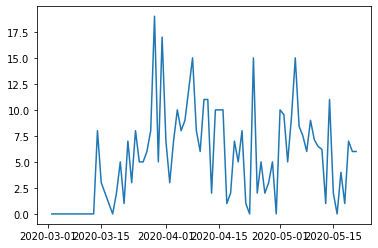

In [105]:
plt.plot(dataf_rabat.la_date,dataf_rabat.Infectés)

In [107]:
dictionnaire_III,dictionnaire_R=filtrage(40000,1,0,np.arange(2,83),dataf_rabat)

In [108]:
keyminval(dictionnaire_III)

('beta est:0.9909999999999999 gamma est:0.9409999999999998', 898.8535093563548)

In [110]:
Sttt,Ittt,Rttt=SolutionSIR(40000,1,0,np.arange(2,183),0.9909999999999999,0.9409999999999998)

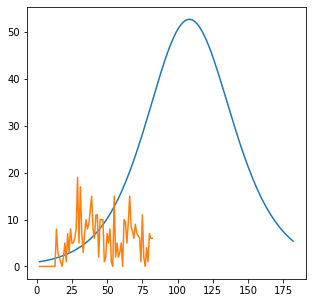

In [114]:
plt.figure(figsize=(5,5))
plt.plot(np.arange(2,183),Ittt)
plt.plot(np.arange(2,83),dataf_rabat.Infectés)
plt.savefig("RabatRA.png")
plt.show()


# la région Oreintal


In [115]:
dforeintal=pd.read_excel(r"C:\Users\youne\Desktop\pfa\DataFrame.xlsx","Oreintal")
dforeintal

,date,infecte,morts,recuperé,temperature
0,2020-03-02,0.0,0.0,0.0,16.0
1,2020-03-03,0.0,0.0,0.0,16.5
2,2020-03-04,0.0,0.0,0.0,17.0
3,2020-03-05,0.0,0.0,0.0,15.0
4,2020-03-06,0.0,0.0,0.0,14.0
...,...,...,...,...,...
76,2020-05-17,1.0,0.0,2.0,21.5
77,2020-05-18,0.0,0.0,1.0,21.5
78,2020-05-19,0.0,0.0,3.0,21.5
79,2020-05-20,1.0,0.0,4.0,22.0


In [116]:

df_oreintal_inf_recu=imputer_mean.fit_transform(dforeintal[['infecte','recuperé']])

In [117]:
df_oreintal_inf_recu=df_oreintal_inf_recu.T
toreintal=dforeintal["date"]
print(toreintal.shape)
print(df_oreintal_inf_recu[0].shape)
print(dforeintal["morts"].shape)

(81,)
(81,)
(81,)


In [118]:
dforeintal["morts"][np.isnan(dforeintal["morts"])]=0

E:\Anconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


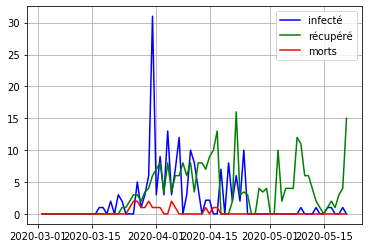

In [119]:
plot_data(df_oreintal_inf_recu,dforeintal,toreintal)

In [120]:
Suscptibleo=[]
S=30000
for i in range(81):
    S=S-df_oreintal_inf_recu[0][i]-df_oreintal_inf_recu[1][i]
    Suscptibleo.append(S)
dataf_oreintal= pd.DataFrame({'la_date':toreintal,'suscptible':Suscptibleo,'Infectés':df_oreintal_inf_recu[0],'récupérés':df_oreintal_inf_recu[1],'morts':dforeintal["morts"]})
dataf_oreintal

,la_date,suscptible,Infectés,récupérés,morts
0,2020-03-02,30000.000000,0.0,0.0,0.0
1,2020-03-03,30000.000000,0.0,0.0,0.0
2,2020-03-04,30000.000000,0.0,0.0,0.0
3,2020-03-05,30000.000000,0.0,0.0,0.0
4,2020-03-06,30000.000000,0.0,0.0,0.0
...,...,...,...,...,...
76,2020-05-17,29571.056203,1.0,2.0,0.0
77,2020-05-18,29570.056203,0.0,1.0,0.0
78,2020-05-19,29567.056203,0.0,3.0,0.0
79,2020-05-20,29562.056203,1.0,4.0,0.0


In [121]:
dataf_oreintal=Dectect_aberrante(dataf_oreintal)

6.0
31.0
9.0
13.0
7.0
12.0
10.0
8.0
7.0
8.0
6.0
10.0
16.0


E:\Anconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


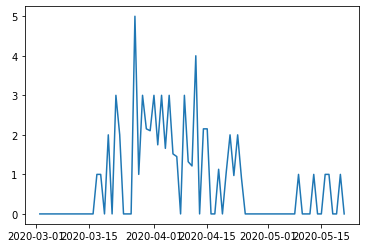

In [122]:
plt.plot(dataf_oreintal.la_date,dataf_oreintal.Infectés)

In [123]:
dictionnaire_III,dictionnaire_R=filtrage(30000,1,0,np.arange(2,83),dataf_oreintal)

In [124]:
keyminval(dictionnaire_III)

('beta est:0.9909999999999999 gamma est:0.9609999999999999', 525.2667159161167)

In [131]:
Sor,Ior,Ror=SolutionSIR(30000,1,0,np.arange(2,283),0.990,0.960)

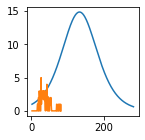

In [134]:
plt.figure(figsize=(2,2))
plt.plot(np.arange(2,283),Ior)
plt.plot(np.arange(2,83),dataf_oreintal.Infectés)
plt.savefig("oriental.png")
plt.show()

## la région Darra_tafilalet

In [135]:
dfdaraa=pd.read_excel(r"C:\Users\youne\Desktop\pfa\DataFrame.xlsx","Daraa - Tafilalet")
dfdaraa

,date,infecte,morts,recuperé,temperature
0,2020-03-02,0.0,0.0,0.0,16.0
1,2020-03-03,0.0,0.0,0.0,16.5
2,2020-03-04,0.0,0.0,0.0,17.0
3,2020-03-05,0.0,0.0,0.0,15.0
4,2020-03-06,0.0,0.0,0.0,14.0
...,...,...,...,...,...
76,2020-05-17,0.0,0.0,4.0,25.0
77,2020-05-18,0.0,0.0,10.0,27.0
78,2020-05-19,0.0,0.0,5.0,29.0
79,2020-05-20,0.0,0.0,5.0,29.5


In [136]:
df_daraa_inf_recu=imputer_mean.fit_transform(dfdaraa[['infecte','recuperé']])

In [137]:
df_daraa_inf_recu=df_daraa_inf_recu.T
tdaraa=dfdaraa["date"]
print(tdaraa.shape)
print(df_daraa_inf_recu[0].shape)
print(dfdaraa["morts"].shape)

(81,)
(81,)
(81,)


In [138]:
dfdaraa["morts"][np.isnan(dfdaraa["morts"])]=0

E:\Anconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


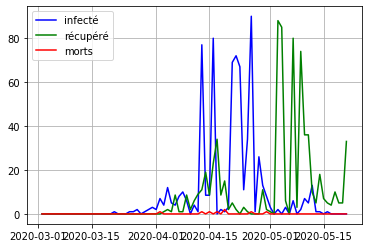

In [139]:
plot_data(df_daraa_inf_recu,dfdaraa,tdaraa)

In [140]:
Suscptibled=[]
S=25000
for i in range(81):
    S=S-df_daraa_inf_recu[0][i]-df_daraa_inf_recu[1][i]
    Suscptibled.append(S)
dataf_daraa= pd.DataFrame({'la_date':tdaraa,'suscptible':Suscptibled,'Infectés':df_daraa_inf_recu[0],'récupérés':df_daraa_inf_recu[1],'morts':dfdaraa["morts"]})
dataf_daraa

,la_date,suscptible,Infectés,récupérés,morts
0,2020-03-02,25000.000000,0.0,0.0,0.0
1,2020-03-03,25000.000000,0.0,0.0,0.0
2,2020-03-04,25000.000000,0.0,0.0,0.0
3,2020-03-05,25000.000000,0.0,0.0,0.0
4,2020-03-06,25000.000000,0.0,0.0,0.0
...,...,...,...,...,...
76,2020-05-17,23667.597731,0.0,4.0,0.0
77,2020-05-18,23657.597731,0.0,10.0,0.0
78,2020-05-19,23652.597731,0.0,5.0,0.0
79,2020-05-20,23647.597731,0.0,5.0,0.0


In [141]:
dataf_daraa=Dectect_aberrante(dataf_daraa)

77.0
80.0
69.0
72.0
67.0
34.0
90.0
26.0
23.0
34.0
88.0
85.0
80.0
74.0
36.0
36.0
33.0


E:\Anconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


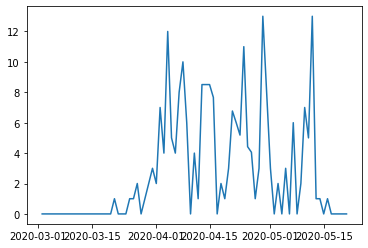

In [142]:
plt.plot(dataf_daraa.la_date,dataf_daraa.Infectés)

In [143]:
dictionnaire_III,dictionnaire_R=filtrage(25000,1,0,np.arange(2,83),dataf_daraa)

In [144]:
keyminval(dictionnaire_III)

('beta est:0.9909999999999999 gamma est:0.9409999999999998', 1142.676206173901)

In [145]:
Sor,Ior,Ror=SolutionSIR(25000,1,0,np.arange(2,283),0.990,0.940)

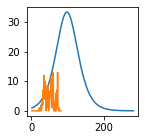

In [147]:
plt.figure(figsize=(2,2))
plt.plot(np.arange(2,283),Ior)
plt.plot(np.arange(2,83),dataf_daraa.Infectés)
plt.savefig("daraa.png")
plt.show()

In [148]:
dfsouss=pd.read_excel(r"C:\Users\youne\Desktop\pfa\DataFrame.xlsx","Souss - Massa")
dfsouss

,date,infecte,morts,recuperé,temperature
0,2020-03-02,0.0,0.0,0.0,16.0
1,2020-03-03,0.0,0.0,0.0,16.5
2,2020-03-04,0.0,0.0,0.0,17.0
3,2020-03-05,0.0,0.0,0.0,15.0
4,2020-03-06,0.0,0.0,0.0,14.0
...,...,...,...,...,...
76,2020-05-17,0.0,0.0,1.0,20.5
77,2020-05-18,0.0,0.0,0.0,22.5
78,2020-05-19,0.0,0.0,3.0,27.0
79,2020-05-20,1.0,0.0,0.0,22.5


In [149]:
df_souss_inf_recu=imputer_mean.fit_transform(dfsouss[['infecte','recuperé']])

In [150]:
df_souss_inf_recu=df_souss_inf_recu.T
tsouss=dfsouss["date"]
print(tsouss.shape)
print(df_souss_inf_recu[0].shape)
print(dfsouss["morts"].shape)

(81,)
(81,)
(81,)


In [151]:
dfsouss["morts"][np.isnan(dfsouss["morts"])]=0

E:\Anconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


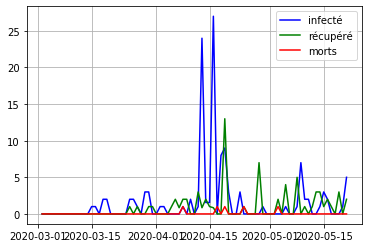

In [152]:
plot_data(df_souss_inf_recu,dfsouss,tsouss)

In [153]:
Suscptibles=[]
S=20000
for i in range(81):
    S=S-df_souss_inf_recu[0][i]-df_souss_inf_recu[1][i]
    Suscptibles.append(S)
dataf_souss= pd.DataFrame({'la_date':tsouss,'suscptible':Suscptibles,'Infectés':df_souss_inf_recu[0],'récupérés':df_souss_inf_recu[1],'morts':dfsouss["morts"]})
dataf_souss

,la_date,suscptible,Infectés,récupérés,morts
0,2020-03-02,20000.000000,0.0,0.0,0.0
1,2020-03-03,20000.000000,0.0,0.0,0.0
2,2020-03-04,20000.000000,0.0,0.0,0.0
3,2020-03-05,20000.000000,0.0,0.0,0.0
4,2020-03-06,20000.000000,0.0,0.0,0.0
...,...,...,...,...,...
76,2020-05-17,19816.347614,0.0,1.0,0.0
77,2020-05-18,19816.347614,0.0,0.0,0.0
78,2020-05-19,19813.347614,0.0,3.0,0.0
79,2020-05-20,19812.347614,1.0,0.0,0.0


In [154]:
dataf_souss=Dectect_aberrante(dataf_souss)

24.0
27.0
8.0
9.0
7.0
5.0
3.0
13.0
7.0
4.0
5.0
3.0
3.0
3.0


E:\Anconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


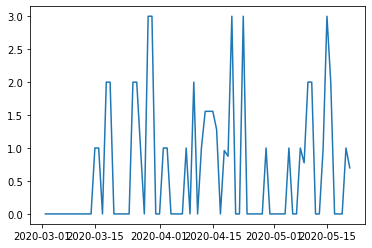

In [155]:
plt.plot(dataf_souss.la_date,dataf_souss.Infectés)

In [165]:
dictionnaire_III,dictionnaire_R=filtrage(20000,1,0,np.arange(2,83),dataf_souss)

In [166]:
keyminval(dictionnaire_III)

('beta est:0.5509999999999999 gamma est:0.5309999999999999',
 181.16999252918657)

In [167]:
Sor,Ior,Ror=SolutionSIR(20000,1,0,np.arange(2,683),0.55,0.53)

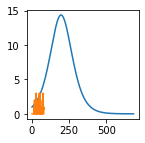

In [169]:
plt.figure(figsize=(2,2))
plt.plot(np.arange(2,683),Ior)
plt.plot(np.arange(2,83),dataf_souss.Infectés)
plt.savefig("souss.png")
plt.show()

# yeteteeeyy

In [170]:
dfbeni=pd.read_excel(r"C:\Users\youne\Desktop\pfa\DataFrame.xlsx","beni-mellal")
dfbeni

,date,infecté,morts,recupéré,temperature
0,2020-03-02,0.0,0.0,0.0,17.5
1,2020-03-03,0.0,0.0,0.0,18.0
2,2020-03-04,0.0,0.0,0.0,23.0
3,2020-03-05,0.0,0.0,0.0,21.0
4,2020-03-06,0.0,0.0,0.0,14.5
...,...,...,...,...,...
76,2020-05-17,3.0,0.0,3.0,18.0
77,2020-05-18,0.0,0.0,0.0,21.0
78,2020-05-19,0.0,0.0,0.0,22.0
79,2020-05-20,0.0,0.0,7.0,22.5


(81,)
(81,)
(81,)


E:\Anconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


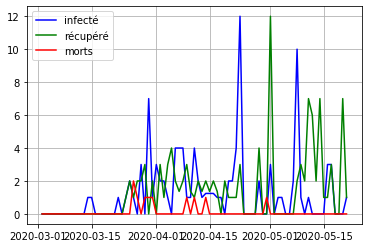

7.0
12.0
10.0
12.0
7.0
6.0
7.0
7.0


E:\Anconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


('beta est:0.581 gamma est:0.5609999999999999', 117.44053399026679)

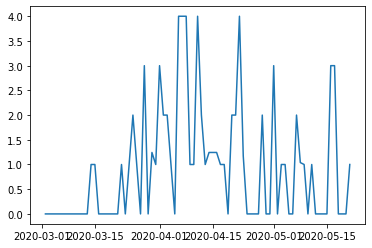

In [177]:
df_beni_inf_recu=imputer_mean.fit_transform(dfbeni[['infecté','recupéré']])
##
df_beni_inf_recu=df_beni_inf_recu.T
tbeni=dfbeni["date"]
print(tbeni.shape)
print(df_beni_inf_recu[0].shape)
print(dfbeni["morts"].shape)
#
dfbeni["morts"][np.isnan(dfbeni["morts"])]=0
#
plot_data(df_beni_inf_recu,dfbeni,tbeni)
#
Suscptibled=[]
S=30000
for i in range(81):
    S=S-df_beni_inf_recu[0][i]-df_beni_inf_recu[1][i]
    Suscptibled.append(S)
dataf_beni= pd.DataFrame({'la_date':tbeni,'suscptible':Suscptibled,'Infectés':df_beni_inf_recu[0],'récupérés':df_beni_inf_recu[1],'morts':dfbeni["morts"]})
dataf_beni
#
dataf_beni=Dectect_aberrante(dataf_beni)
#
plt.plot(dataf_beni.la_date,dataf_beni.Infectés)
#
dictionnaire_Ibeni,dictionnaire_R=filtrage(30000,1,0,np.arange(2,83),dataf_beni)
#
keyminval(dictionnaire_Ibeni)
#



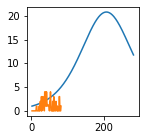

In [180]:
Sor,Ior,Ror=SolutionSIR(30000,1,0,np.arange(2,283),0.581,0.560)
plt.figure(figsize=(2,2))
plt.plot(np.arange(2,283),Ior)
plt.plot(np.arange(2,83),dataf_beni.Infectés)
plt.savefig("beni_mellal.png")
plt.show()

# le région

In [181]:
dftanger=pd.read_excel(r"C:\Users\youne\Desktop\pfa\DataFrame.xlsx","tanger-ELHoceima")
dftanger

,date,infectés,morts,guéris,température
0,2020-03-02,0.0,0.0,0.0,16.0
1,2020-03-03,0.0,0.0,0.0,14.5
2,2020-03-04,0.0,0.0,0.0,15.5
3,2020-03-05,0.0,0.0,0.0,15.5
4,2020-03-06,0.0,0.0,0.0,13.5
...,...,...,...,...,...
76,2020-05-17,13.0,0.0,37.0,17.5
77,2020-05-18,5.0,0.0,28.0,20.0
78,2020-05-19,10.0,1.0,47.0,18.0
79,2020-05-20,0.0,0.0,0.0,21.0


(81,)
(81,)
(81,)


E:\Anconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


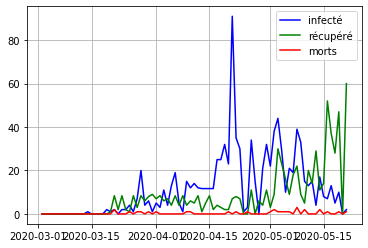

91.0
44.0
30.0
23.0
29.0
52.0
37.0
28.0
47.0
60.0


E:\Anconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


('beta est:0.9909999999999999 gamma est:0.9409999999999998', 956.5332685571028)

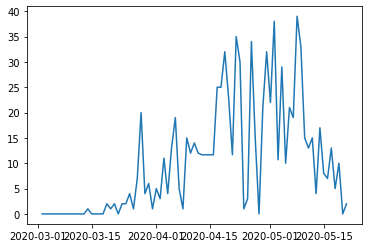

In [183]:
df_tanger_inf_recu=imputer_mean.fit_transform(dftanger[['infectés','guéris']])
##
df_tanger_inf_recu=df_tanger_inf_recu.T
ttanger=dftanger["date"]
print(ttanger.shape)
print(df_tanger_inf_recu[0].shape)
print(dftanger["morts"].shape)
#
dftanger["morts"][np.isnan(dftanger["morts"])]=0
#
plot_data(df_tanger_inf_recu,dftanger,ttanger)
#
Suscptibled=[]
S=40000
for i in range(81):
    S=S-df_tanger_inf_recu[0][i]-df_tanger_inf_recu[1][i]
    Suscptibled.append(S)
dataf_tanger= pd.DataFrame({'la_date':ttanger,'suscptible':Suscptibled,'Infectés':df_tanger_inf_recu[0],'récupérés':df_tanger_inf_recu[1],'morts':dftanger["morts"]})
dataf_tanger
#
dataf_tanger=Dectect_aberrante(dataf_tanger)
#
plt.plot(dataf_tanger.la_date,dataf_tanger.Infectés)
#
dictionnaire_Itanger,dictionnaire_R=filtrage(40000,1,0,np.arange(2,83),dataf_tanger)
#
keyminval(dictionnaire_Itanger)
#


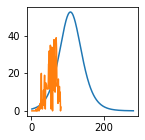

In [185]:
Sor,Ior,Ror=SolutionSIR(40000,1,0,np.arange(2,283),0.991,0.941)
plt.figure(figsize=(2,2))
plt.plot(np.arange(2,283),Ior)
plt.plot(np.arange(2,83),dataf_tanger.Infectés)
plt.savefig("tanger.png")
plt.show()

# la région

In [186]:
dffes=pd.read_excel(r"C:\Users\youne\Desktop\pfa\DataFrame.xlsx","Fes - Meknes")
dffes

,date,infecte,morts,recuperé,temperature
0,2020-03-02,0.0,0,0.0,16.0
1,2020-03-03,0.0,0,0.0,16.5
2,2020-03-04,0.0,0,0.0,17.0
3,2020-03-05,0.0,0,0.0,15.0
4,2020-03-06,0.0,0,0.0,14.0
...,...,...,...,...,...
76,2020-05-17,6.0,0,32.0,21.0
77,2020-05-18,13.0,0,39.0,22.5
78,2020-05-19,1.0,0,45.0,23.0
79,2020-05-20,21.0,1,39.0,21.0


(81,)
(81,)
(81,)


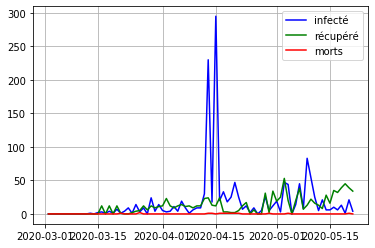

230.0
295.0
47.0
47.0
44.0
45.0
83.0
54.0
53.0
45.0


E:\Anconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


('beta est:0.9909999999999999 gamma est:0.9309999999999998', 2989.429338810489)

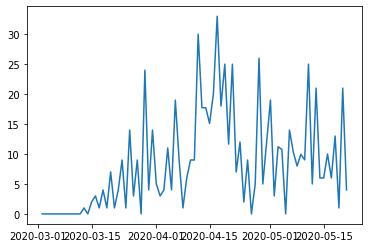

In [187]:
df_fes_inf_recu=imputer_mean.fit_transform(dffes[['infecte','recuperé']])
##
df_fes_inf_recu=df_fes_inf_recu.T
tfes=dffes["date"]
print(tfes.shape)
print(df_fes_inf_recu[0].shape)
print(dffes["morts"].shape)

plot_data(df_fes_inf_recu,dffes,tfes)
#
Suscptibled=[]
S=35000
for i in range(81):
    S=S-df_fes_inf_recu[0][i]-df_fes_inf_recu[1][i]
    Suscptibled.append(S)
dataf_fes= pd.DataFrame({'la_date':tfes,'suscptible':Suscptibled,'Infectés':df_fes_inf_recu[0],'récupérés':df_fes_inf_recu[1],'morts':dffes["morts"]})
dataf_fes
#
dataf_fes=Dectect_aberrante(dataf_fes)
#
plt.plot(dataf_fes.la_date,dataf_fes.Infectés)
#
dictionnaire_Ifes,dictionnaire_R=filtrage(35000,1,0,np.arange(2,83),dataf_fes)
#
keyminval(dictionnaire_Ifes)
#

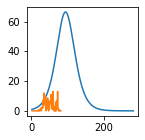

In [189]:
Sor,Ior,Ror=SolutionSIR(35000,1,0,np.arange(2,283),0.991,0.931)
plt.figure(figsize=(2,2))
plt.plot(np.arange(2,283),Ior)
plt.plot(np.arange(2,83),dataf_daraa.Infectés)
plt.savefig("fes.png")
plt.show()

# LA région Guelmim

In [197]:
dfguelmim=pd.read_excel(r"C:\Users\youne\Desktop\pfa\DataFrame.xlsx","Guelmim - Oued noun")
dfguelmim

,la date,infectés,morts,guéris,température
0,2020-03-02,0.0,0,0.0,17.5
1,2020-03-03,0.0,0,0.0,20.5
2,2020-03-04,0.0,0,0.0,18.0
3,2020-03-05,0.0,0,0.0,20.0
4,2020-03-06,0.0,0,0.0,18.0
...,...,...,...,...,...
76,2020-05-17,0.0,0,5.0,23.0
77,2020-05-18,0.0,0,0.0,24.0
78,2020-05-19,0.0,0,0.0,25.5
79,2020-05-20,0.0,0,0.0,24.5


(81,)
(81,)
(81,)


E:\Anconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


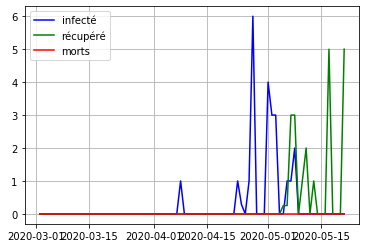

1.0
1.0
0.2875
1.0
6.0
4.0
3.0
3.0
1.0
1.0
2.0
0.25316455696202533
0.25316455696202533
3.0
3.0
1.0
2.0
1.0
5.0
5.0


E:\Anconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


('beta est:0.05099999999999999 gamma est:0.020999999999999998',
 63.836831577245725)

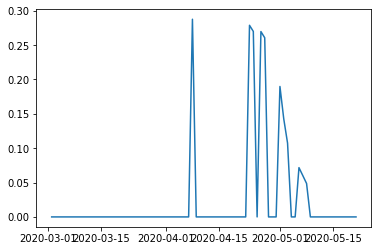

In [199]:
df_guelmim_inf_recu=imputer_mean.fit_transform(dfguelmim[['infectés','guéris']])
##
df_guelmim_inf_recu=df_guelmim_inf_recu.T
tguelmim=dfguelmim["la date"]
print(tguelmim.shape)
print(df_guelmim_inf_recu[0].shape)
print(dfguelmim["morts"].shape)
#
dfguelmim["morts"][np.isnan(dfguelmim["morts"])]=0
#
plot_data(df_guelmim_inf_recu,dfguelmim,tguelmim)
#
Suscptibled=[]
S=50000
for i in range(81):
    S=S-df_guelmim_inf_recu[0][i]-df_guelmim_inf_recu[1][i]
    Suscptibled.append(S)
dataf_guelmim= pd.DataFrame({'la_date':tguelmim,'suscptible':Suscptibled,'Infectés':df_guelmim_inf_recu[0],'récupérés':df_guelmim_inf_recu[1],'morts':dfguelmim["morts"]})
dataf_guelmim
#
dataf_guelmim=Dectect_aberrante(dataf_guelmim)
#
plt.plot(dataf_guelmim.la_date,dataf_guelmim.Infectés)
#
dictionnaire_Iguelmim,dictionnaire_R=filtrage(50000,1,0,np.arange(2,83),dataf_guelmim)
#
keyminval(dictionnaire_Iguelmim)
#

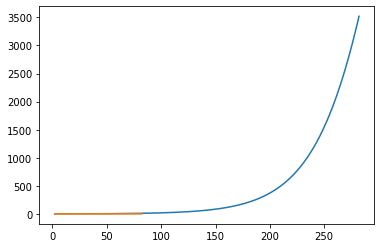

In [200]:
Sor,Ior,Ror=SolutionSIR(50000,1,0,np.arange(2,283),0.051,0.021)
#
plt.plot(np.arange(2,283),Ior)
plt.plot(np.arange(2,83),dataf_guelmim.Infectés)

In [ ]:
dffes=pd.read_excel(r"C:\Users\youne\Desktop\pfa\DataFrame.xlsx","Fes - Meknes")
dffes

In [ ]:
df_fes_inf_recu=imputer_mean.fit_transform(dffes[['infecte','recuperé']])
##
#df_daraa_inf_recu=df_daraa_inf_recu.T
#tdaraa=dfdaraa["date"]
#print(tdaraa.shape)
#print(df_daraa_inf_recu[0].shape)
#print(dfdaraa["morts"].shape)
#
#dfdaraa["morts"][np.isnan(dfdaraa["morts"])]=0
#
#plot_data(df_daraa_inf_recu,dfdaraa,tdaraa)
#
#Suscptibled=[]
#S=2000000
#for i in range(81):
    #S=S-df_daraa_inf_recu[0][i]-df_daraa_inf_recu[1][i]
    #Suscptibled.append(S)
#dataf_daraa= pd.DataFrame({'la_date':tdaraa,'suscptible':Suscptibled,'Infectés':df_daraa_inf_recu[0],'récupérés':df_daraa_inf_recu[1],'morts':dfdaraa["morts"]})
#dataf_daraa
#
#dataf_daraa=Dectect_aberrante(dataf_daraa)
#
#plt.plot(dataf_daraa.la_date,dataf_daraa.Infectés)
#
#dictionnaire_III,dictionnaire_R=filtrage(2000000,1,0,np.arange(2,83),dataf_daraa)
#
#keyminval(dictionnaire_III)
#

In [ ]:
#Sor,Ior,Ror=SolutionSIR(20000,1,0,np.arange(2,283),0.9909999999999999,0.9309999999999998)
#
#plt.plot(np.arange(2,283),Ior)
#plt.plot(np.arange(2,83),dataf_daraa.Infectés)